<a href="https://colab.research.google.com/github/MPGarg/ERA1_Session10/blob/main/ERA1_S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
#!pip install -U albumentations
!pip install torch_lr_finder
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_lr_finder import LRFinder

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Import files from GIT Hub

In [3]:
!git clone https://github.com/MPGarg/ERA1_main_repo.git

Cloning into 'ERA1_main_repo'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), 8.00 KiB | 2.00 MiB/s, done.


# Custom ResNet class is imported

In [6]:
from ERA1_main_repo.models import custom_resnet
from ERA1_main_repo.models.custom_resnet import Custom_ResNet

# Import Other fuctions

In [7]:
from ERA1_main_repo import main, utils
from ERA1_main_repo.utils import *
from ERA1_main_repo.main import train, test, fit_model

# Assign device

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [9]:
view_model = Custom_ResNet().to(device)
summary(view_model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         Dropout2d-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
         Dropout2d-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
        Dropout2d-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

# Show sample images and Load dataset

100%|██████████| 170498071/170498071 [00:01<00:00, 95932625.78it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


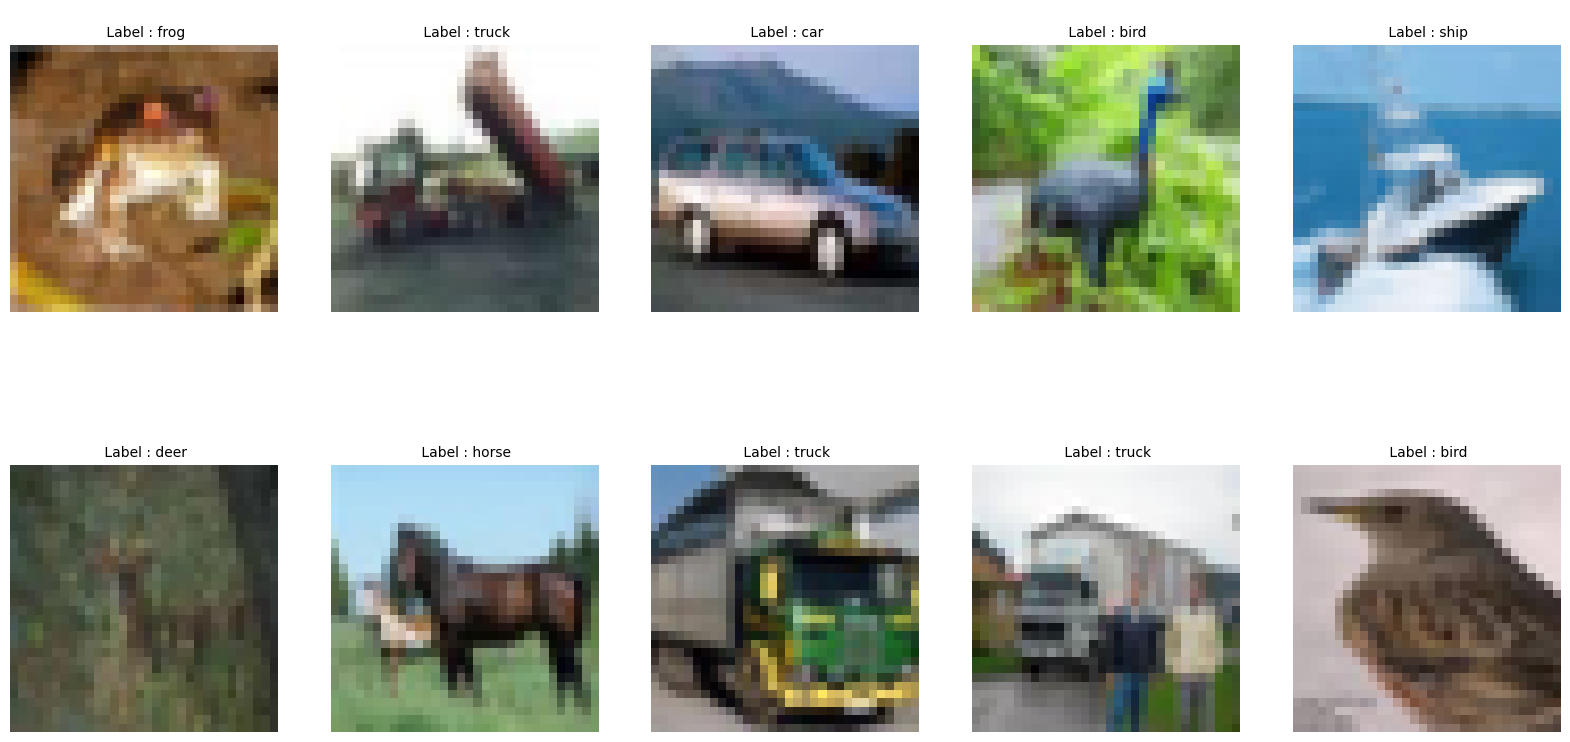

In [10]:
trainset_mod, trainloader_mod, testset_mod, testloader_mod,mean, std,trainset_lr,trainloader_lr = process_dataset(visualize = 'X')

# Find Learning Rate

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.63E-02


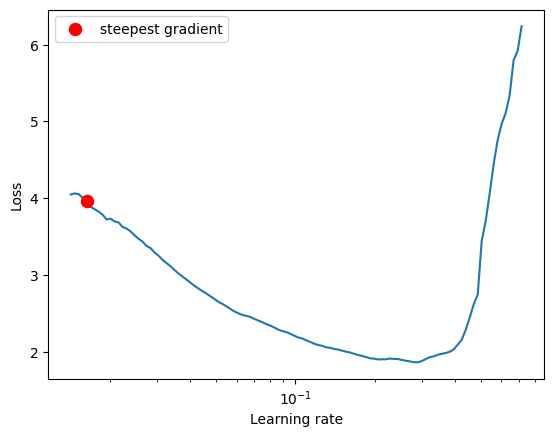

In [21]:
import copy
model = Custom_ResNet(0.02).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(trainloader_lr, end_lr=10, num_iter=200,step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# Train & Test Model

In [22]:
ler_rate = 1.63E-02
optimizer = torch.optim.Adam(model.parameters(), lr=ler_rate/10, weight_decay=1e-4)

scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                                                max_lr=ler_rate,
                                                steps_per_epoch=len(trainloader_mod),
                                                epochs=24,
                                                pct_start=0.15,
                                                div_factor=10,
                                                three_phase=False,
                                                #final_div_factor=100,
                                                anneal_strategy='linear'
                                                )

model_tr, wrong_prediction_list, right_prediction_list, train_losses, train_acc, test_losses, test_acc = fit_model(
                                                    model=model,
                                                    device=device,
                                                    trainloader=trainloader_mod,
                                                    testloader=testloader_mod,
                                                    criterion = nn.CrossEntropyLoss(),
                                                    EPOCHS=24,
                                                    optimizer=optimizer,
                                                    scheduler=scheduler

                                                )

EPOCH: 1 (LR: 0.00163)


100%|██████████| 98/98 [00:20<00:00,  4.71it/s]


Average Training Loss=0.0032158570432662963, Accuracy=42.086


Test set: Average loss: 0.0023, Accuracy: 5830/10000 (58.30%)

EPOCH: 2 (LR: 0.00571658328595793)


100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


Average Training Loss=0.002089918478727341, Accuracy=62.244


Test set: Average loss: 0.0021, Accuracy: 6620/10000 (66.20%)

EPOCH: 3 (LR: 0.00980316657191586)


100%|██████████| 98/98 [00:20<00:00,  4.72it/s]



Average Training Loss=0.0016672646737098695, Accuracy=70.608
Test set: Average loss: 0.0017, Accuracy: 7094/10000 (70.94%)

EPOCH: 4 (LR: 0.01388974985787379)


100%|██████████| 98/98 [00:20<00:00,  4.71it/s]


Average Training Loss=0.001453080368041992, Accuracy=74.568


Test set: Average loss: 0.0015, Accuracy: 7435/10000 (74.35%)

EPOCH: 5 (LR: 0.015972242173169265)


100%|██████████| 98/98 [00:20<00:00,  4.72it/s]


Average Training Loss=0.0012279540848731995, Accuracy=78.742


Test set: Average loss: 0.0014, Accuracy: 7666/10000 (76.66%)

EPOCH: 6 (LR: 0.015173230555522207)


100%|██████████| 98/98 [00:20<00:00,  4.72it/s]



Average Training Loss=0.0010857491439580918, Accuracy=80.99
Test set: Average loss: 0.0013, Accuracy: 7677/10000 (76.77%)

EPOCH: 7 (LR: 0.014374218937875148)


100%|██████████| 98/98 [00:20<00:00,  4.76it/s]


Average Training Loss=0.001049701873064041, Accuracy=81.546


Test set: Average loss: 0.0010, Accuracy: 8313/10000 (83.13%)

EPOCH: 8 (LR: 0.01357520732022809)


100%|██████████| 98/98 [00:20<00:00,  4.78it/s]



Average Training Loss=0.00095809286236763, Accuracy=83.108
Test set: Average loss: 0.0012, Accuracy: 8043/10000 (80.43%)

EPOCH: 9 (LR: 0.012776195702581032)


100%|██████████| 98/98 [00:20<00:00,  4.71it/s]


Average Training Loss=0.0009128009605407714, Accuracy=83.92


Test set: Average loss: 0.0011, Accuracy: 8180/10000 (81.80%)

EPOCH: 10 (LR: 0.011977184084933971)


100%|██████████| 98/98 [00:20<00:00,  4.75it/s]


Average Training Loss=0.0008751612967252731, Accuracy=84.924


Test set: Average loss: 0.0011, Accuracy: 8278/10000 (82.78%)

EPOCH: 11 (LR: 0.011178172467286914)


100%|██████████| 98/98 [00:20<00:00,  4.78it/s]


Average Training Loss=0.0008507135426998138, Accuracy=85.032


Test set: Average loss: 0.0011, Accuracy: 8204/10000 (82.04%)

EPOCH: 12 (LR: 0.010379160849639855)


100%|██████████| 98/98 [00:20<00:00,  4.79it/s]


Average Training Loss=0.0008066549026966095, Accuracy=85.67


Test set: Average loss: 0.0010, Accuracy: 8365/10000 (83.65%)

EPOCH: 13 (LR: 0.009580149231992796)


100%|██████████| 98/98 [00:20<00:00,  4.74it/s]


Average Training Loss=0.0007852604836225509, Accuracy=86.154


Test set: Average loss: 0.0010, Accuracy: 8309/10000 (83.09%)

EPOCH: 14 (LR: 0.008781137614345739)


100%|██████████| 98/98 [00:20<00:00,  4.77it/s]



Average Training Loss=0.0007389304488897324, Accuracy=86.84
Test set: Average loss: 0.0010, Accuracy: 8340/10000 (83.40%)

EPOCH: 15 (LR: 0.00798212599669868)


100%|██████████| 98/98 [00:20<00:00,  4.78it/s]


Average Training Loss=0.0007095274686813354, Accuracy=87.33


Test set: Average loss: 0.0009, Accuracy: 8558/10000 (85.58%)

EPOCH: 16 (LR: 0.007183114379051619)


100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Average Training Loss=0.0006671865981817246, Accuracy=88.178


Test set: Average loss: 0.0009, Accuracy: 8558/10000 (85.58%)

EPOCH: 17 (LR: 0.006384102761404562)


100%|██████████| 98/98 [00:20<00:00,  4.78it/s]


Average Training Loss=0.0006163594081997871, Accuracy=89.11


Test set: Average loss: 0.0008, Accuracy: 8718/10000 (87.18%)

EPOCH: 18 (LR: 0.005585091143757503)


100%|██████████| 98/98 [00:20<00:00,  4.78it/s]


Average Training Loss=0.0005750926688313484, Accuracy=89.886


Test set: Average loss: 0.0007, Accuracy: 8823/10000 (88.23%)

EPOCH: 19 (LR: 0.0047860795261104455)


100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Average Training Loss=0.0005230968713760376, Accuracy=90.888


Test set: Average loss: 0.0007, Accuracy: 8899/10000 (88.99%)

EPOCH: 20 (LR: 0.003987067908463385)


100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


Average Training Loss=0.00045653710037469865, Accuracy=91.952


Test set: Average loss: 0.0006, Accuracy: 9012/10000 (90.12%)

EPOCH: 21 (LR: 0.0031880562908163275)


100%|██████████| 98/98 [00:20<00:00,  4.78it/s]


Average Training Loss=0.0003893448096513748, Accuracy=93.15


Test set: Average loss: 0.0006, Accuracy: 9074/10000 (90.74%)

EPOCH: 22 (LR: 0.0023890446731692685)


100%|██████████| 98/98 [00:20<00:00,  4.76it/s]


Average Training Loss=0.0003310827639698982, Accuracy=94.138


Test set: Average loss: 0.0005, Accuracy: 9162/10000 (91.62%)

EPOCH: 23 (LR: 0.0015900330555222095)


100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Average Training Loss=0.0002525157481431961, Accuracy=95.682


Test set: Average loss: 0.0005, Accuracy: 9249/10000 (92.49%)

EPOCH: 24 (LR: 0.0007910214378751505)


100%|██████████| 98/98 [00:20<00:00,  4.81it/s]



Average Training Loss=0.0002042243281006813, Accuracy=96.714
Test set: Average loss: 0.0005, Accuracy: 9265/10000 (92.65%)

Total Number of incorrectly predicted images by model is 735


# Display Validation Accuracy & Loss

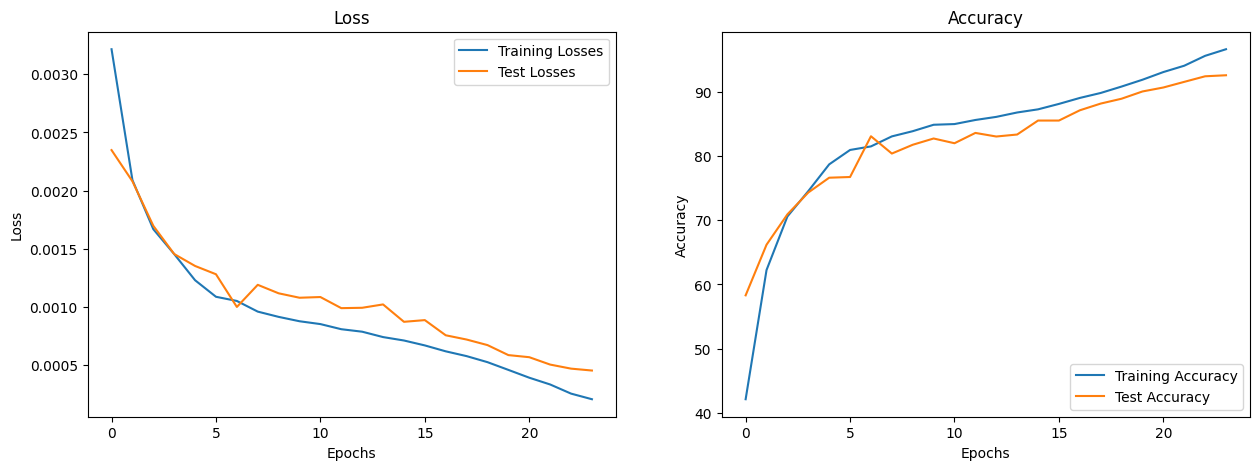

In [23]:
plot_acc_loss(train_acc,train_losses,test_acc,test_losses)

# Display wrong prediction

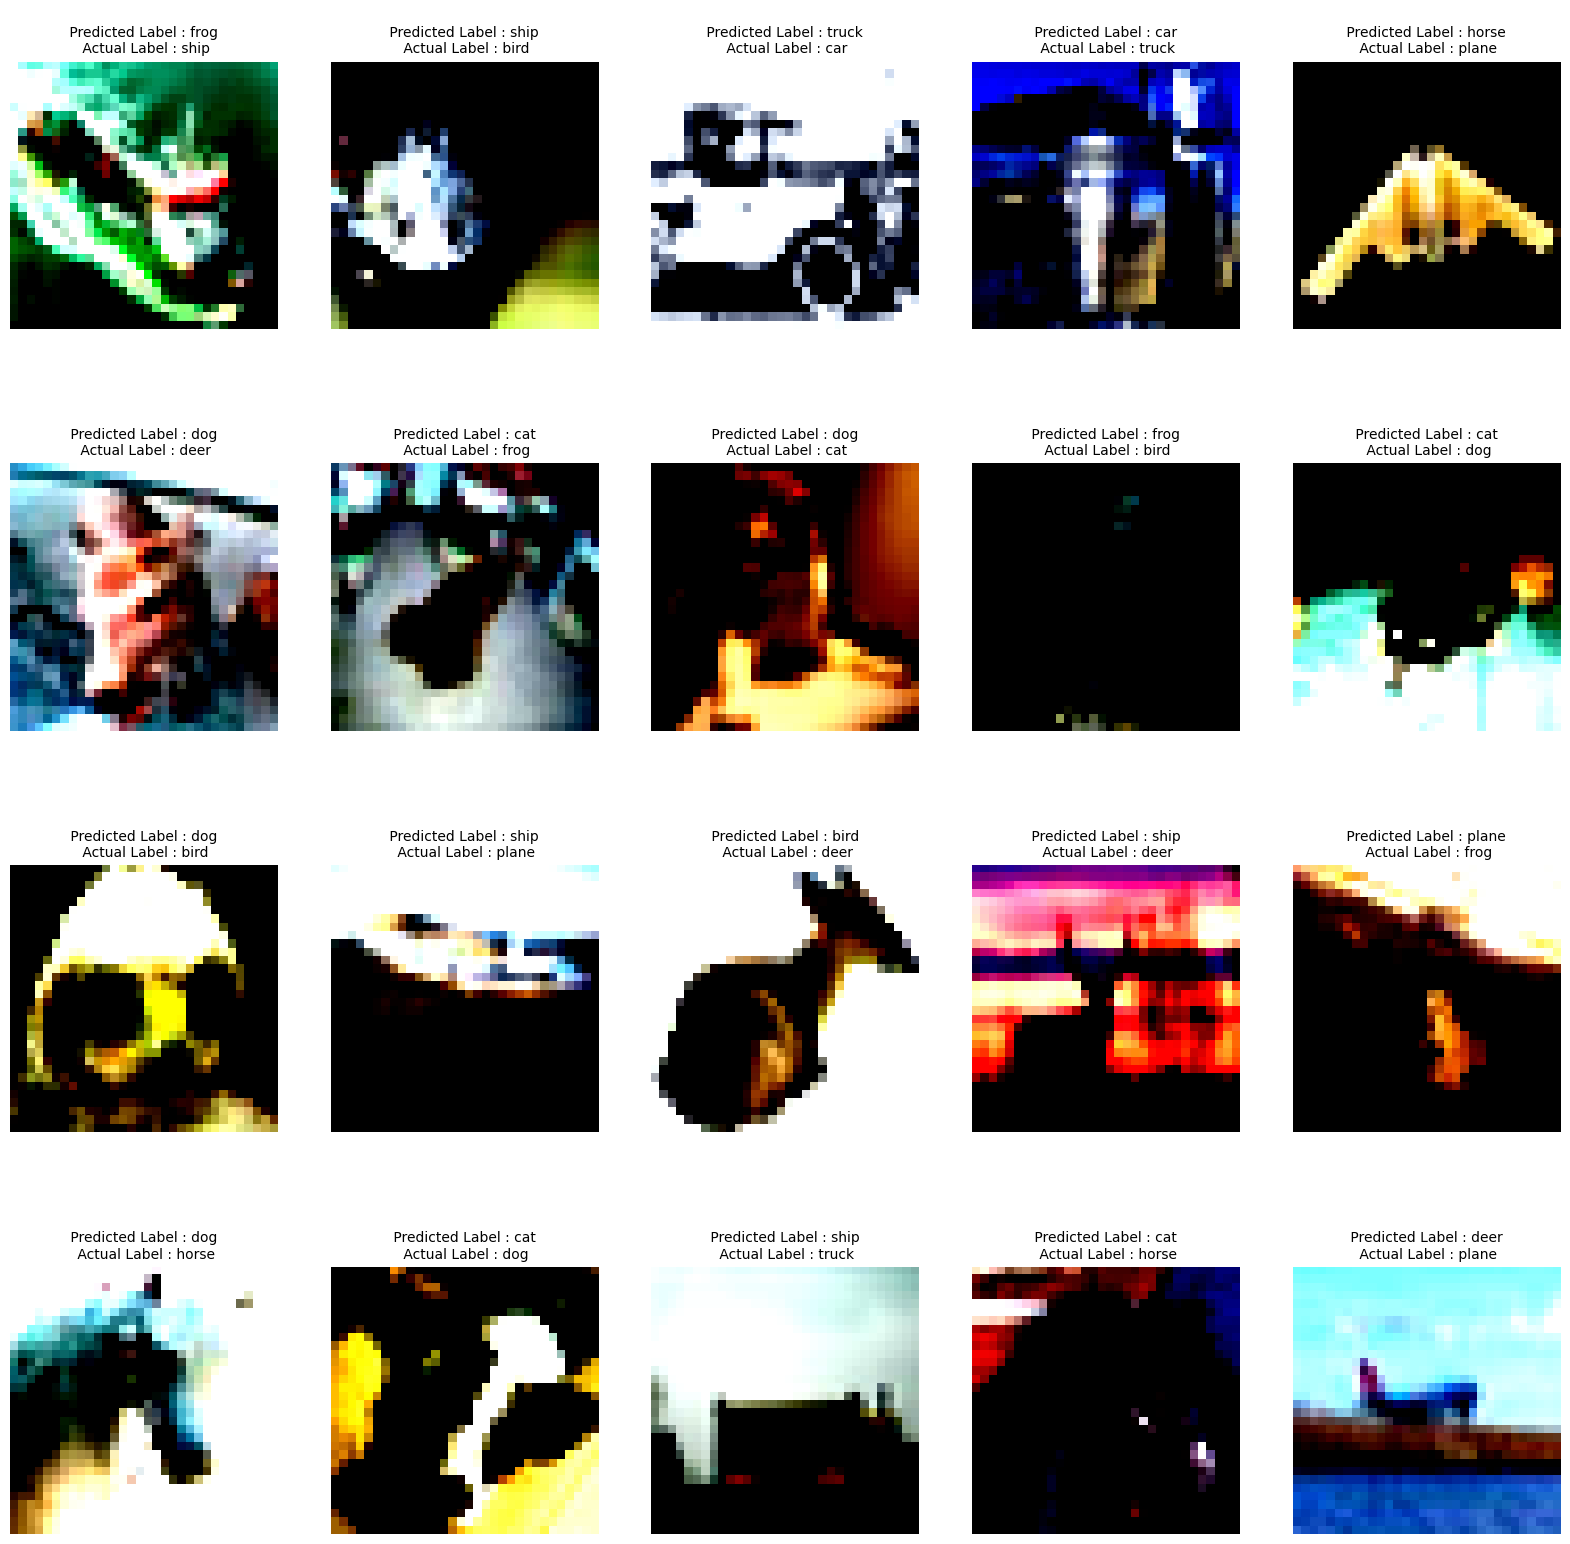

In [24]:
display_incorrect_pred(wrong_prediction_list)